# Mounting the google drive

In [1]:
# Mounting the google drive to get the images

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Importing useful libraries and data loading

In [131]:
# Importing libraries and loading the mnist dataset

import numpy as np # For numerical purpose

# For visualization
import matplotlib.pyplot as plt 
import seaborn as sns

# For image related tasks
import cv2 
from PIL import Image

# Neural network realted tasks
import tensorflow as tf
tf.random.set_seed(4) # Setting the random state
from tensorflow import keras
from keras.datasets import mnist # Downloading the data
from tensorflow.math import confusion_matrix

import pickle # For model saving

In [4]:
# Let us load the data

(X_train,y_train),(X_test,y_test) = mnist.load_data()

# EDA

In [5]:
# Let us see the shapes of our datasets

print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(60000, 28, 28) (10000, 28, 28) (60000,) (10000,)


From this we can see all the images are gray scale and has 28 by 28 dimensions <br>
And also we can see that our training set contains 60000 images and the test set contains 10000 images

This is number 2


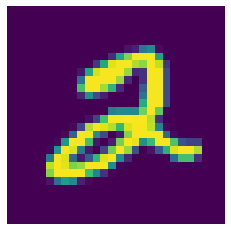

In [9]:
# Lets try to see one image

print(f'This is number {y_train[5]}')
plt.imshow(X_train[5])
plt.axis('off')
plt.show()

In [10]:
# Lets see how many unique values are there in our labels

print(np.unique(y_train))
print(np.unique(y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [11]:
# Let us scale our data to be between 0 and 1

X_train = X_train / 255
X_test = X_test / 255

# Model training

In [14]:
# Lets create our deep neural network

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(64,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

In [17]:
# Lets compile our model

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [18]:
# Lets train our model with 10 epochs

model.fit(X_train,y_train,
          validation_split = 0.1,
          epochs = 10
          )

Epoch 1/10
1688/1688 [==============================] - 6s 3ms/step - loss: 0.2538 - accuracy: 0.9262 - val_loss: 0.1158 - val_accuracy: 0.9645
Epoch 2/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.1069 - accuracy: 0.9673 - val_loss: 0.0918 - val_accuracy: 0.9735
Epoch 3/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0733 - accuracy: 0.9770 - val_loss: 0.0944 - val_accuracy: 0.9728
Epoch 4/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0556 - accuracy: 0.9819 - val_loss: 0.0768 - val_accuracy: 0.9788
Epoch 5/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0435 - accuracy: 0.9863 - val_loss: 0.0790 - val_accuracy: 0.9773
Epoch 6/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0350 - accuracy: 0.9884 - val_loss: 0.0781 - val_accuracy: 0.9788
Epoch 7/10
1688/1688 [==============================] - 8s 5ms/step - loss: 0.0294 - accuracy: 0.9900 - val_loss: 0.0858 - val_accuracy:

# Model evaluation

In [19]:
# Lets see our model accuracy for the training set

_ ,accuracy = model.evaluate(X_train,y_train)
accuracy

1875/1875 [==============================] - 4s 2ms/step - loss: 0.0215 - accuracy: 0.9939


0.9939166903495789

In [21]:
# Lets see our model accuracy for the test set

_ ,accuracy = model.evaluate(X_test,y_test)
accuracy

313/313 [==============================] - 1s 3ms/step - loss: 0.0881 - accuracy: 0.9786


0.978600025177002

In [26]:
# Lets create a prediction lists for the test set

y_pred = model.predict(X_test)
y_pred.shape

313/313 [==============================] - 1s 2ms/step


(10000, 10)

In [30]:
# Lets change the above predictions into labels

y_pred_labels = np.array([np.argmax(pred) for pred in y_pred])
y_pred_labels.shape

(10000,)

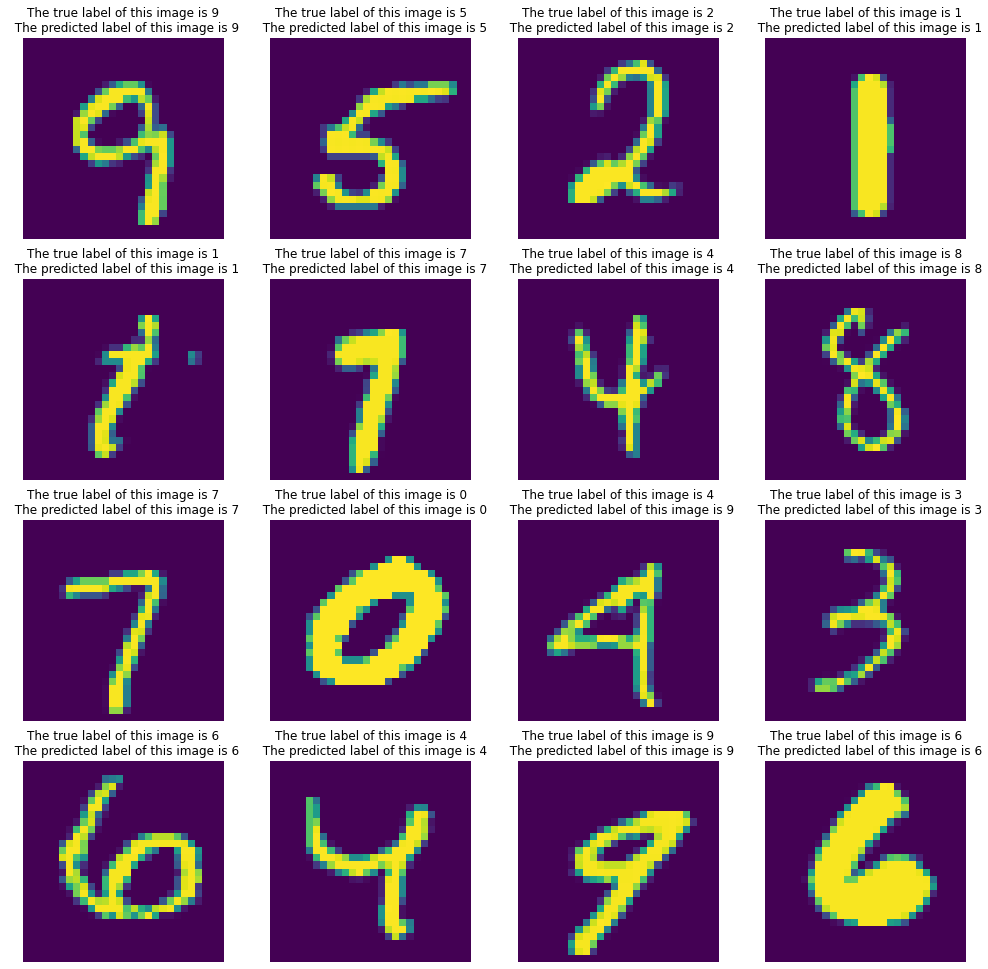

In [53]:
# Lets take a 16 images in the test set and see if it is accuratly predicted

n = 16
fig = plt.figure(figsize = (17,17))
for i in range(1,n+1):  
  index_ = np.random.choice(range(0,10000))
  fig.add_subplot(4,4,i)
  plt.imshow(X_test[index_])
  plt.axis('off')
  plt.title(f'The true label of this image is {y_test[index_]}\n\
  The predicted label of this image is {y_pred_labels[index_]}')

plt.show()

In [54]:
# Lets build a confustion matrix to see our model accuracy

conf_matrix = confusion_matrix(y_test,y_pred_labels)
conf_matrix

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 971,    1,    2,    2,    0,    0,    2,    1,    1,    0],
       [   0, 1126,    4,    1,    0,    1,    2,    0,    1,    0],
       [   4,    1, 1007,    2,    3,    0,    4,    8,    3,    0],
       [   0,    0,    4,  996,    0,    3,    0,    2,    2,    3],
       [   0,    1,    6,    0,  961,    0,    2,    3,    0,    9],
       [   2,    0,    0,   11,    2,  866,    5,    2,    3,    1],
       [   5,    3,    3,    0,    5,    3,  937,    0,    2,    0],
       [   1,    4,    6,    2,    0,    0,    0, 1013,    1,    1],
       [   3,    2,    3,   15,    4,    5,    2,    2,  930,    8],
       [   5,    2,    0,    3,   13,    4,    0,    4,    1,  977]],
      dtype=int32)>

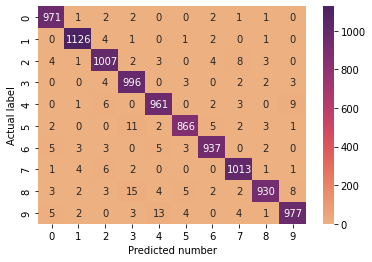

In [57]:
# Lets visualize our confusion matrix using seaborn

sns.heatmap(conf_matrix,
            annot = True,
            cmap = 'flare',
            fmt = 'd'
            )
plt.xlabel('Predicted number')
plt.ylabel('Actual label')
plt.show()

# Creating a predictive system

Enter the path of the image: /content/number_8_mnist.jpg
1/1 [==============================] - 0s 15ms/step


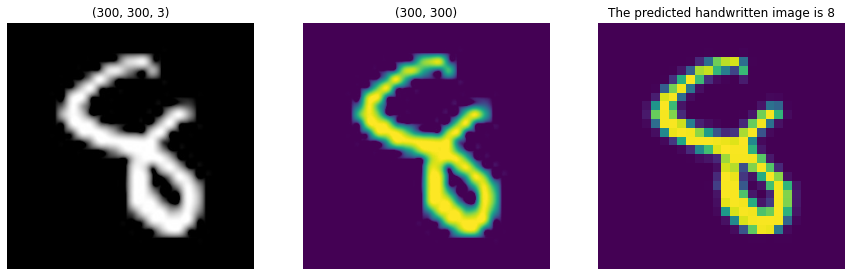

In [129]:
# Let us create a place where a user can input a path and get the prediction

path = input('Enter the path of the image: ')

fig = plt.figure(figsize = (15,15))

fig.add_subplot(1,3,1)

# Reading the image
image = cv2.imread(path)
plt.title(image.shape)
plt.imshow(image)
plt.axis('off')

# Converting the image into Gray scale
fig.add_subplot(1,3,2)
gray_image = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
plt.title(gray_image.shape)
plt.imshow(gray_image)
plt.axis('off')

# Resizing, Scaling and predicting
fig.add_subplot(1,3,3)
resized_image = cv2.resize(gray_image,(28,28))
resized_image = resized_image / 255

pred = model.predict(reshaped_image)
label = np.argmax(pred)

plt.title(f"The predicted handwritten image is {label}")
plt.imshow(resized_image)
plt.axis('off')

plt.show()

# Saving the model

In [132]:
# Saving the model

file_name = 'models/mnist_model.h5'
with open(file_name,'wb') as f:
  pickle.dump(model,f)